# Lab1.2 on Digital Image Processing on the topic "Object recognition by color"

- [Tasks](#Tasks:)
- [Dataset](#Dataset)
- [Histograms and how to work with them](#Histograms-and-how-to-work-with-them)
    - [One channel histograms](#One-channel-histograms)
    - [Two channel histograms](#Two-channel-histograms)
    - [Three channel histogram](#Three-channel-histogram)
- [Fitting the parameters of the HoughCircles function](#Fitting-the-parameters-of-the-HoughCircles-function)
- [Main programm](#Main programm)

## Tasks:
1. Prepare a sample of 10 (or more) color digital images (similar to the example below).
2. Create a project in Python (3.x) and connect the scikit-image library.
3. From Lab1.1 take a color digital image loading module and a pixel processing module.
4. Program the formula for converting a color digital image into a color space in accordance with the option (V1: RGB; V2: HSV; V3: CMYK; V4: YUV; V5: Hough Circle + HSV; V6: Hough Circle + HSL).
5. Create food classification from digital images.
6. Determine color characteristics for each dish, set the distribution of values for each color.
7. Conduct an experiment to recognize dishes with visualization of the results.
8. Add a comment to each line of code!
9. Send the program to the teacher.
10. Build a graph of errors of the first and second kind based on the recognition results.
11. Prepare and send a report (title page, task, theoretical part, diagram of the program structure, print screens of the interface and the main steps of the program, conclusion and conclusions, listing of the program with comments, list of used literature).

## Dataset
I have prepared train and test datasets. The train dataset consists of images divided into 6 parts according to the foodstuff: potato, tomato, eggs, tangerine, grapes and banana. Each part consists of 9-10 images. Each image in train dataset contains only one plate with a foodstuff. The test dataset contains 19 images. Each image in test dataset contains 3 plates with different foodstuffs.

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np
%matplotlib inline


TRAIN_PATH = os.path.join(os.getcwd(), 'dataset', 'train')
TEST_PATH = os.path.join(os.getcwd(), 'dataset', 'test')
CHANNEL1 = 0
CHANNEL2 = 1
CHANNEL3 = 2
H_MAX = 180
L_MAX = 256
S_MAX = 256
MASK = None
H_RANGE = [0, H_MAX]
L_RANGE = [0, L_MAX]
S_RANGE = [0, S_MAX]
# Fine tunning by hands!
TRAIN_SETTINGS = dict(dp=2, minDist=350, param1=650, param2=100, minRadius=175, maxRadius=225)
# Fine tunning by hands!
TEST_SETTINGS = dict(dp=2, minDist=300, param1=500, param2=100, minRadius=130, maxRadius=140)
GREEN_COLOR = (0, 1.0, 0)
WHITE_COLOR = (1.0, 1.0, 1.0)

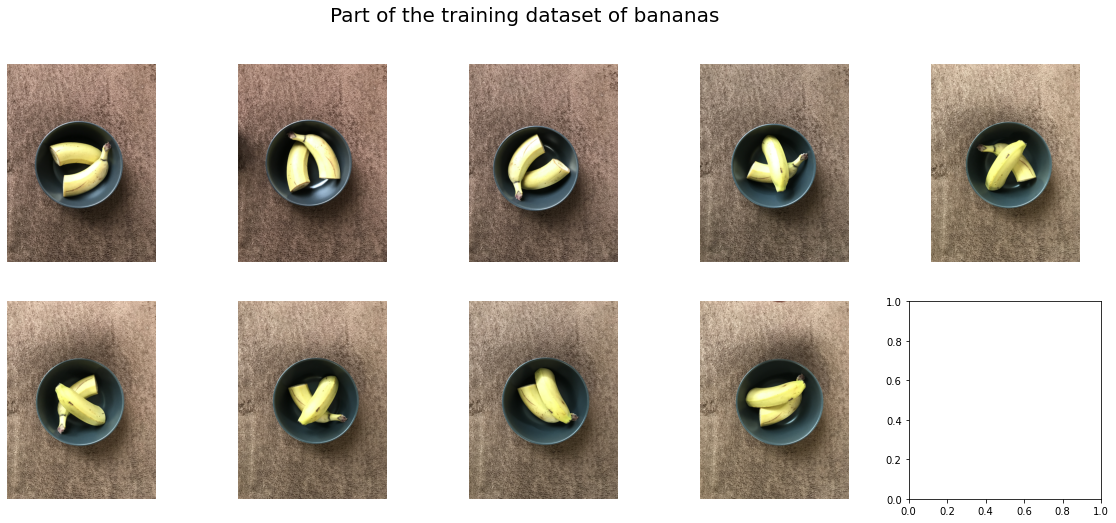

In [2]:
labels = os.listdir(TRAIN_PATH)
label_path = os.path.join(TRAIN_PATH, labels[0])
file_names = os.listdir(label_path)
images = []
for file_name in file_names:
    file_path = os.path.join(label_path, file_name)
    image = plt.imread(file_path)
    images.append(image)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for ax, image in zip(axes, images):
    ax.imshow(image)
    ax.set_axis_off()
fig.suptitle('Part of the training dataset of bananas', fontsize=20)
plt.show()

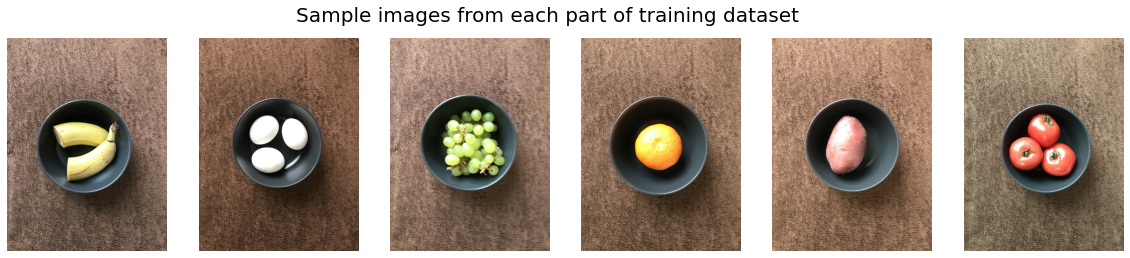

In [3]:
images = []
for label in labels:
    label_path = os.path.join(TRAIN_PATH, label)
    file_names = os.listdir(label_path)
    file_path = os.path.join(label_path, file_names[0])
    image = plt.imread(file_path)
    images.append(image)

fig, axes = plt.subplots(1, 6, figsize=(20, 4))
axes = axes.flatten()
for ax, image in zip(axes, images):
    ax.imshow(image)
    ax.set_axis_off()
fig.suptitle('Sample images from each part of training dataset', fontsize=20)
plt.show()

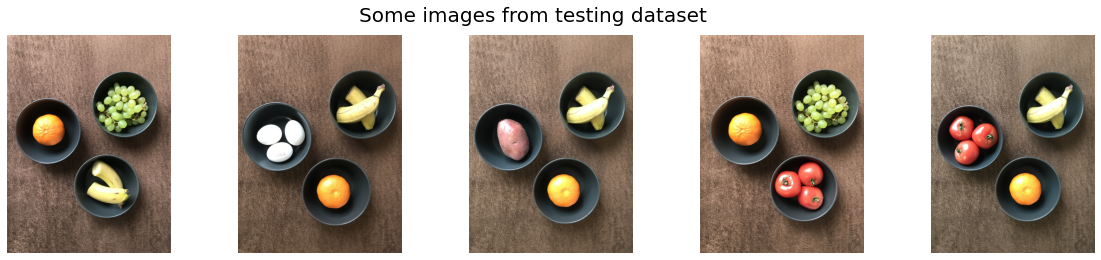

In [4]:
images = []
file_names = os.listdir(TEST_PATH)
for file_name in file_names:
    file_path = os.path.join(TEST_PATH, file_name)
    image = plt.imread(file_path)
    images.append(image)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
axes = axes.flatten()
for ax, image in zip(axes, images):
    ax.imshow(image)
    ax.set_axis_off()
fig.suptitle('Some images from testing dataset', fontsize=20)
plt.show()

## Histograms and how to work with them

In [5]:
image = cv2.imread(os.path.join(TRAIN_PATH, 'banana', 'banana1.png'))
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
h, l, s = cv2.split(hls_image)

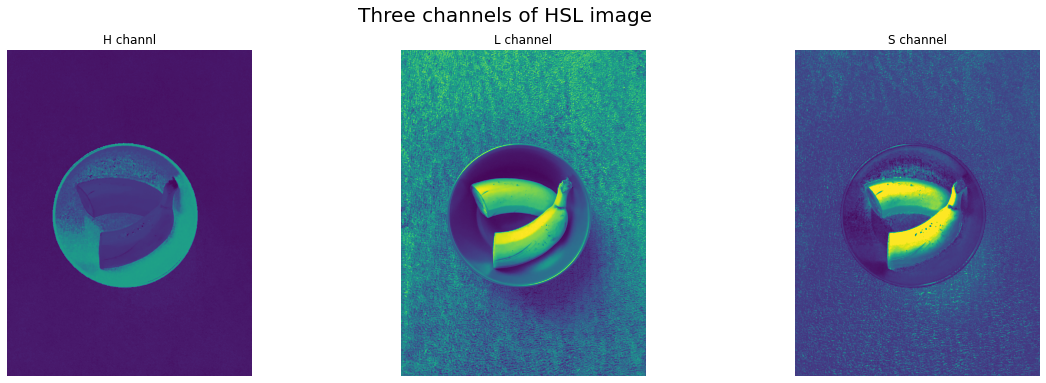

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].imshow(h)
axes[0].set_title('H channl')
axes[0].set_axis_off()
axes[1].imshow(l)
axes[1].set_title('L channel')
axes[1].set_axis_off()
axes[2].imshow(s)
axes[2].set_title('S channel')
axes[2].set_axis_off()
fig.suptitle('Three channels of HSL image', fontsize=20)
plt.show()

### One channel histograms

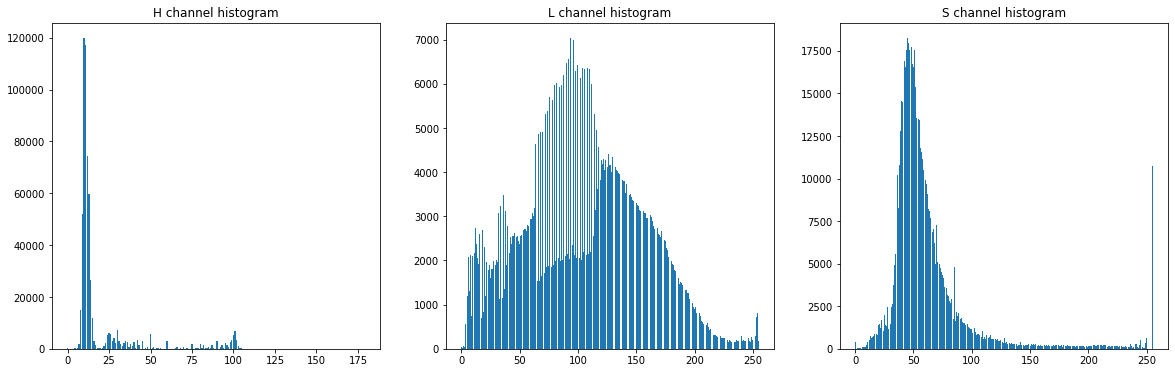

In [7]:
# calcHist: https://docs.opencv.org/4.5.1/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d
h_hist = cv2.calcHist([h], [CHANNEL1], MASK, [H_MAX], H_RANGE, accumulate=False)
h_hist = h_hist.flatten()
l_hist = cv2.calcHist([l], [CHANNEL1], MASK, [L_MAX], L_RANGE, accumulate=False)
l_hist = l_hist.flatten()
s_hist = cv2.calcHist([s], [CHANNEL1], MASK, [S_MAX], S_RANGE, accumulate=False)
s_hist = s_hist.flatten()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].bar(range(H_MAX), h_hist)
axes[0].set_title('H channel histogram')

axes[1].bar(range(L_MAX), l_hist)
axes[1].set_title('L channel histogram')

axes[2].bar(range(S_MAX), s_hist)
axes[2].set_title('S channel histogram')

plt.show()

### Two channel histograms

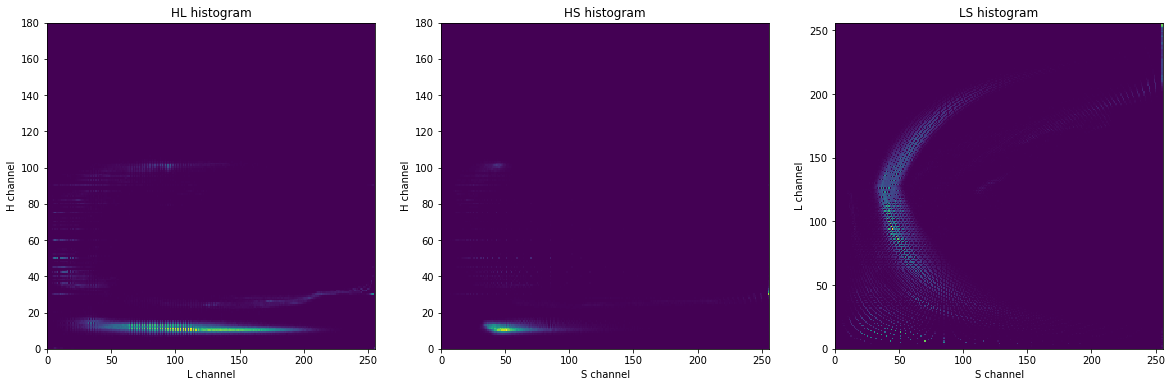

In [8]:
hist2D_HL = cv2.calcHist([hls_image], [CHANNEL1, CHANNEL2], MASK, [H_MAX, L_MAX], H_RANGE + L_RANGE, accumulate=False)
hist2D_HS = cv2.calcHist([hls_image], [CHANNEL1, CHANNEL3], MASK, [H_MAX, S_MAX], H_RANGE + S_RANGE, accumulate=False)
hist2D_LS = cv2.calcHist([hls_image], [CHANNEL2, CHANNEL3], MASK, [L_MAX, S_MAX], L_RANGE + S_RANGE, accumulate=False)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].pcolor(hist2D_HL)
axes[0].set_title('HL histogram')
axes[0].set_xlabel('L channel')
axes[0].set_ylabel('H channel')

axes[1].pcolor(hist2D_HS)
axes[1].set_title('HS histogram')
axes[1].set_xlabel('S channel')
axes[1].set_ylabel('H channel')

axes[2].pcolor(hist2D_LS)
axes[2].set_title('LS histogram')
axes[2].set_xlabel('S channel')
axes[2].set_ylabel('L channel')
plt.show()

### Three channel histogram
is a voxel parallelepiped. Therefore it cannot be displayed.

In [9]:
hist3D = cv2.calcHist(
    [hls_image],
    [CHANNEL1, CHANNEL2, CHANNEL3],
    MASK,
    [H_MAX, L_MAX, S_MAX],
    H_RANGE + L_RANGE + S_RANGE,
    accumulate=False
)

## Fitting the parameters of the HoughCircles function

In the ideal, she should find all the plates in the image.

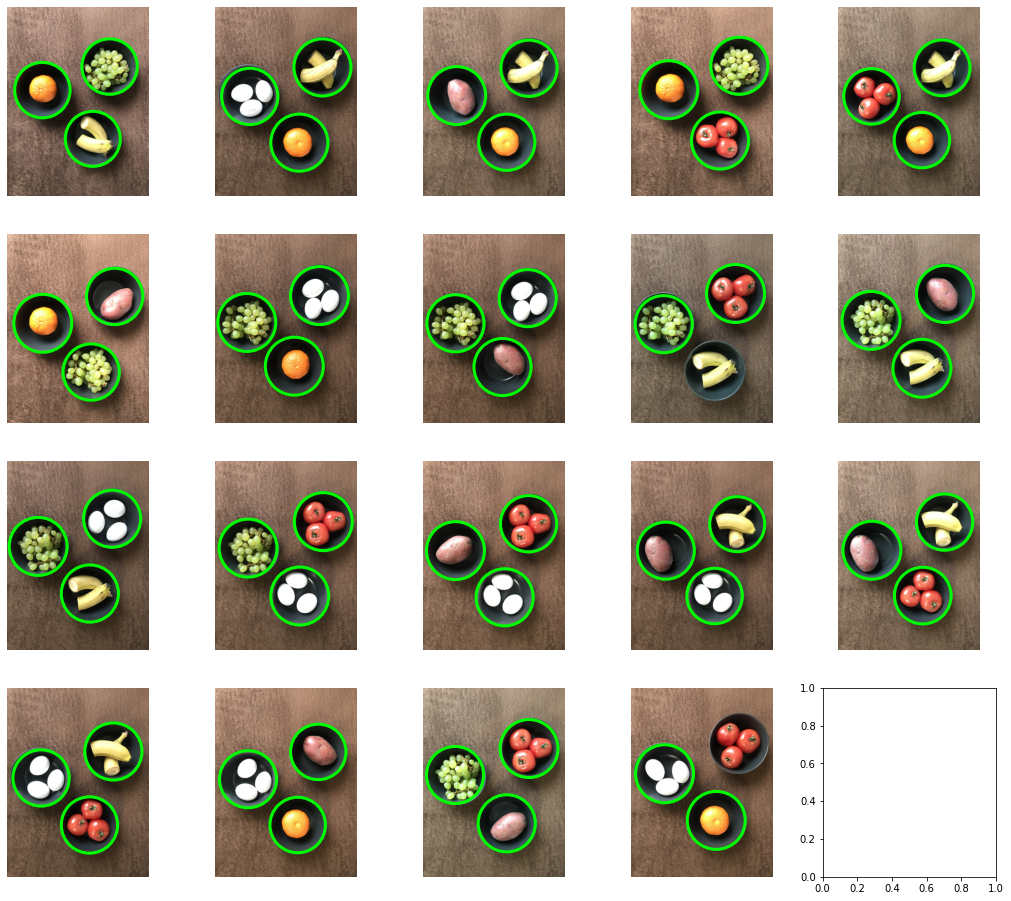

In [10]:
def circles_check(path):
    """
    Used to set up arguments in a function cv2.HoughCircles.

    path - to the directory with images.
    """
    filenames = os.listdir(path)
    _, axes = plt.subplots(4, 5, figsize=(18, 16))
    axes = axes.flatten()
    for ax, filename in zip(axes, filenames):
        image = plt.imread(os.path.join(path, filename))
        grayscale_image = cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)
        # Fine tunning by hands!
        circles = cv2.HoughCircles(
            grayscale_image,
            cv2.HOUGH_GRADIENT,
            dp=2,
            minDist=300,
            param1=500,
            param2=100,
            minRadius=130,
            maxRadius=140
        )
        if circles is not None:
            for circle in circles[0]:
                x, y, r = map(int, circle)
                draw_circle = patches.Circle((x, y), radius=r, color=GREEN_COLOR, linewidth=3, fill=False)
                ax.set_axis_off()
                ax.imshow(image)
                ax.add_patch(draw_circle)
        else:
            print('No circles found.')

    plt.show()


circles_check(TEST_PATH)

## Main programm

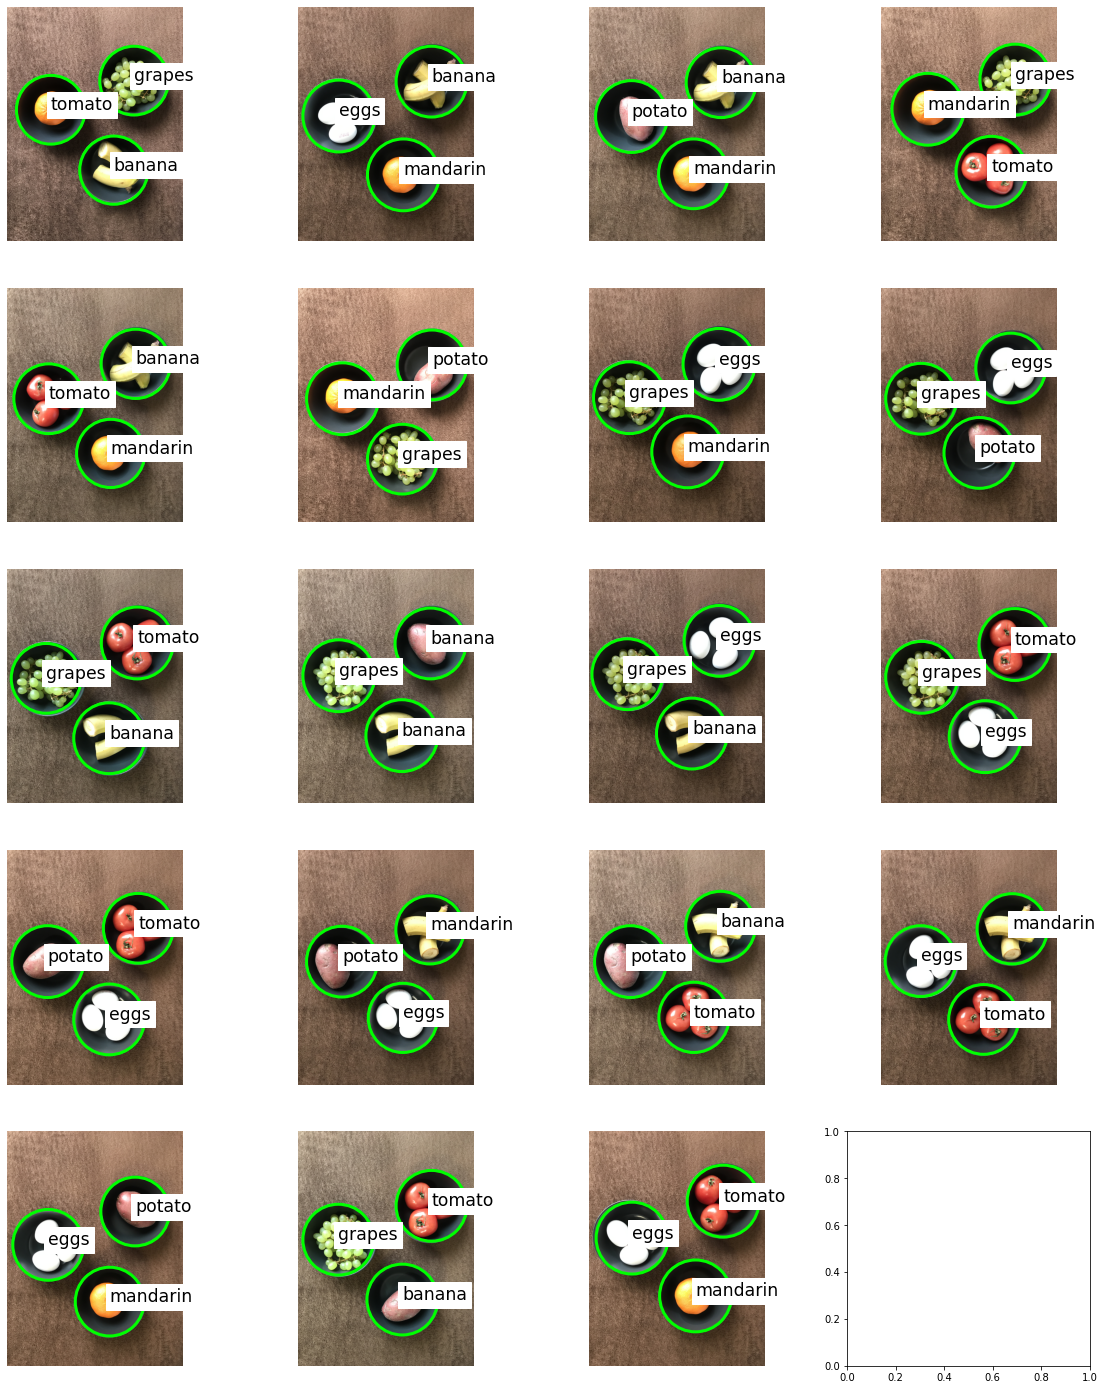

In [11]:
def get_circles(image, settings):
    """
    Returns a list of the circles found in the image.
    
    image - the image on which the circles are searched.
    settings - a named argument dictionary for the HoughCircles function.
    HoughCircles: https://docs.opencv.org/4.5.1/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d
    """
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(grayscale_image, cv2.HOUGH_GRADIENT, **settings)
    return circles[0]


def get_intermediate_accumulator(image):
    """Returns the accumulator histogram for the cropped parts of the image with circles."""
    intermediate_accumulator = np.zeros((H_MAX, L_MAX, S_MAX))
    circles = get_circles(image, TRAIN_SETTINGS)
    hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    for circle in circles:
        x, y, r = map(int, circle)
        crop = hls_image[y-r:y+r, x-r:x+r, :]
        hist = cv2.calcHist(
            [crop],
            [CHANNEL1, CHANNEL2, CHANNEL3],
            MASK,
            [H_MAX, L_MAX, S_MAX],
            H_RANGE + L_RANGE + S_RANGE,
            accumulate=False
        )
        intermediate_accumulator += hist
    return intermediate_accumulator


def get_mean_hist(path, label):
    """Returns the mean histogram for the label."""
    filenames = os.listdir(os.path.join(path, label))
    accumulator = np.zeros((H_MAX, L_MAX, S_MAX))
    for filename in filenames:
        image = cv2.imread(os.path.join(path, label, filename))
        intermediate_accumulator = get_intermediate_accumulator(image)
        accumulator += intermediate_accumulator
    mean_hist = accumulator / len(filenames)
    mean_hist = mean_hist.astype('float32')
    return mean_hist


def train(path):
    """
    Returns a dictionary where the key=label, value=mean histogram.
    
    path - path to train dataset.
    """
    labels = os.listdir(path)
    some_dict = {}
    for label in labels:
        some_dict[label] = get_mean_hist(path, label)
    return some_dict


def get_predict(hist, train_results):
    """
    Returns predicted label for input hisogram.
    
    train_results - dictionary where the key=label, value=mean histogram.
    """
    some_dict = train_results.copy()
    predict = None
    for label, label_hist in some_dict.items():
        compare = cv2.compareHist(hist, label_hist, cv2.HISTCMP_CORREL)
        some_dict[label] = compare
    max_compare = None
    for label, compare in some_dict.items():
        if max_compare is None or compare > max_compare:
            max_compare = compare
            predict = label
    return predict


def test(path, train_results):
    """
    Shows test images with found circles and predicted labels for them.
    
    path - path to test dataset.
    train_results - dictionary where the key=label, value=mean histogram.
    """
    fig, axes = plt.subplots(5, 4, figsize=(20, 25))
    axes = axes.flatten()
    filenames = os.listdir(path)
    for ax, filename in zip(axes, filenames):
        bgr_image = cv2.imread(os.path.join(path, filename))
        rgb_image = plt.imread(os.path.join(path, filename))
        circles = get_circles(bgr_image, TEST_SETTINGS)
        hls_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HLS)
        for circle in circles:
            x, y, r = map(int, circle)
            crop = hls_image[y-r:y+r, x-r:x+r, :]
            hist = cv2.calcHist(
                [crop],
                [CHANNEL1, CHANNEL2, CHANNEL3],
                MASK,
                [H_MAX, L_MAX, S_MAX],
                H_RANGE + L_RANGE + S_RANGE,
                accumulate=False
            )
            predict = get_predict(hist, train_results)
            
            draw_circle = patches.Circle(
                (x, y),
                radius=r,
                color=GREEN_COLOR,
                linewidth=3,
                fill=False
            )
            ax.imshow(rgb_image)
            ax.set_axis_off()
            ax.add_patch(draw_circle)
            ax.text(x, y, predict, fontsize='xx-large', backgroundcolor=WHITE_COLOR)
    plt.show()


train_results = train(TRAIN_PATH)
test(TEST_PATH, train_results)

Based on the test results, the following confusion matrix was built:

|          | grapes | mandarin | banana | eggs | potato | tomato |
|----------|:------:|:--------:|:------:|:----:|:------:|:------:|
| grapes   |   11   |          |        |      |        |        |
| mandarin |        |     8    |    2   |      |        |        |
| banana   |        |          |    8   |      |        |        |
| eggs     |        |          |        |  9   |   2    |        |
| potato   |        |          |        |      |   7    |        |
| tomato   |        |     1    |        |      |        |   9    |